In [1]:
# import the neccesary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import statsmodels.stats.api as sms
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
# import modules from this project
import data
from model import Model

In [3]:
data_frame = pd.read_csv("dataset/bank-additional-full.csv",sep=';'  , engine='python')

In [4]:
# initialize the modelling and preprocessing classes
processor = data.PreProcessing(data_frame)
model = Model()

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


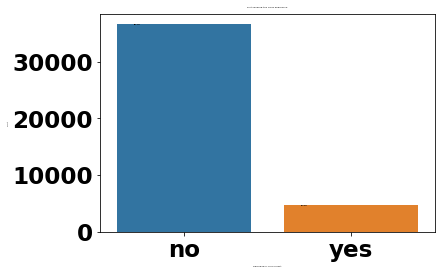

In [5]:
# use the plot_target_imbalance method from the preprocessing class
processor.plot_target_imbalance()

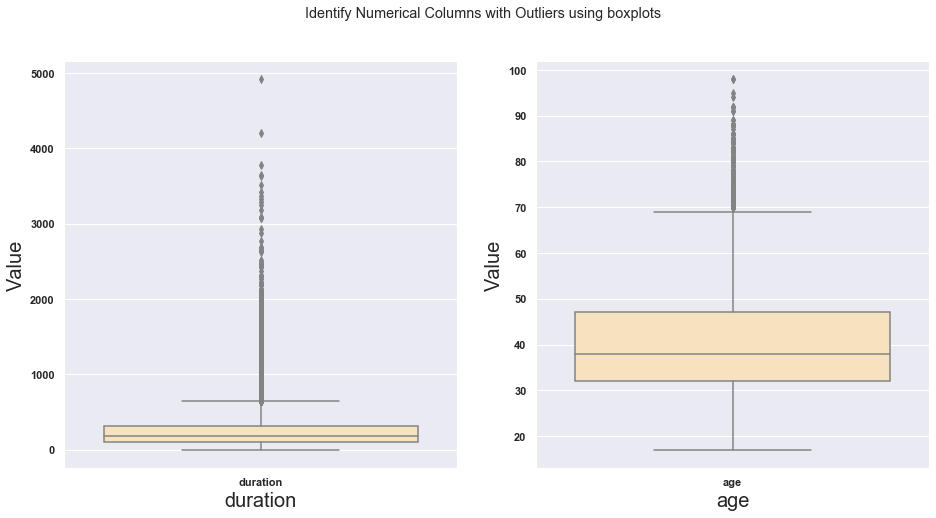

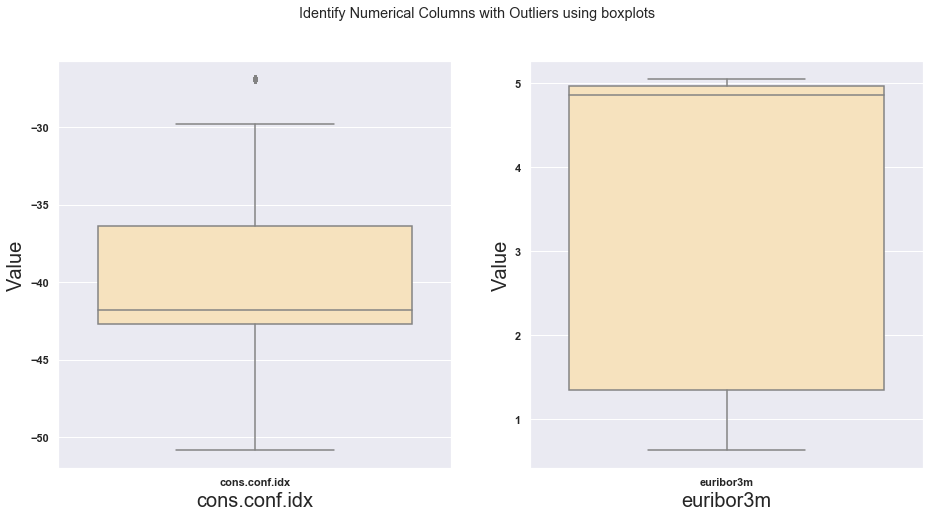

In [6]:
processor.detect_outliers_boxplot(['duration','age','cons.conf.idx','euribor3m'])

In [8]:
processor.handle_outliers(['duration','age','cons.conf.idx'])

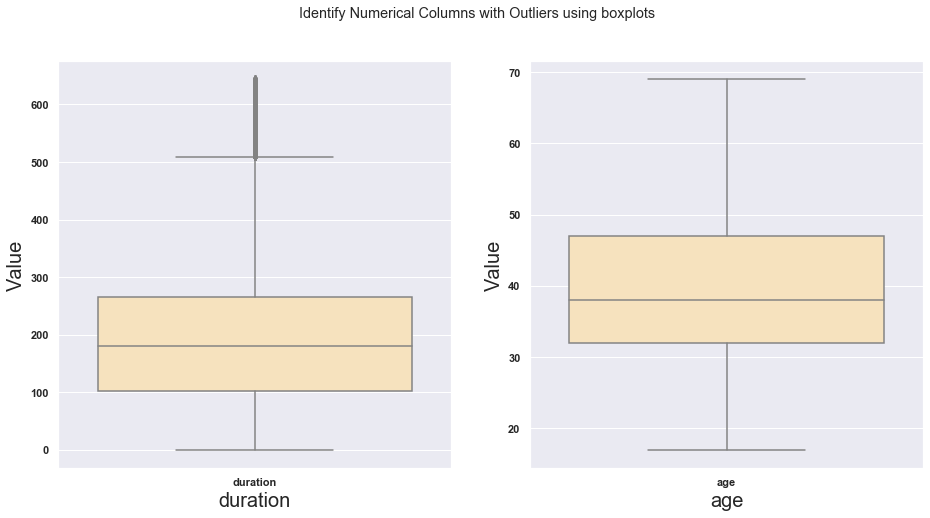

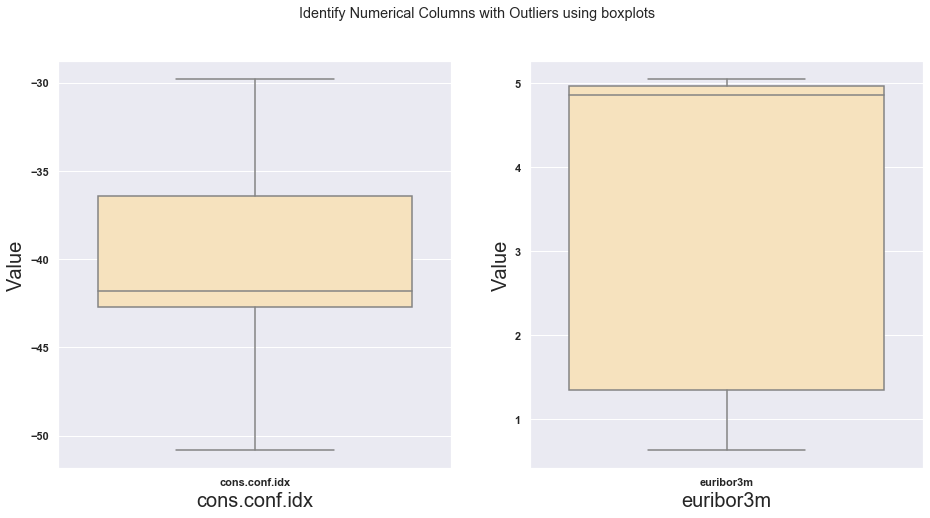

In [9]:
processor.detect_outliers_boxplot(['duration','age','cons.conf.idx','euribor3m'])

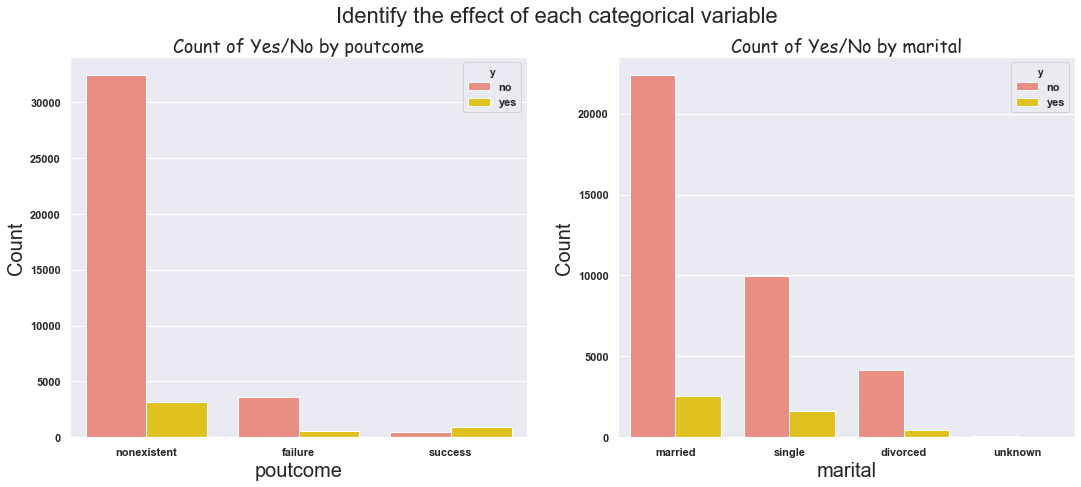

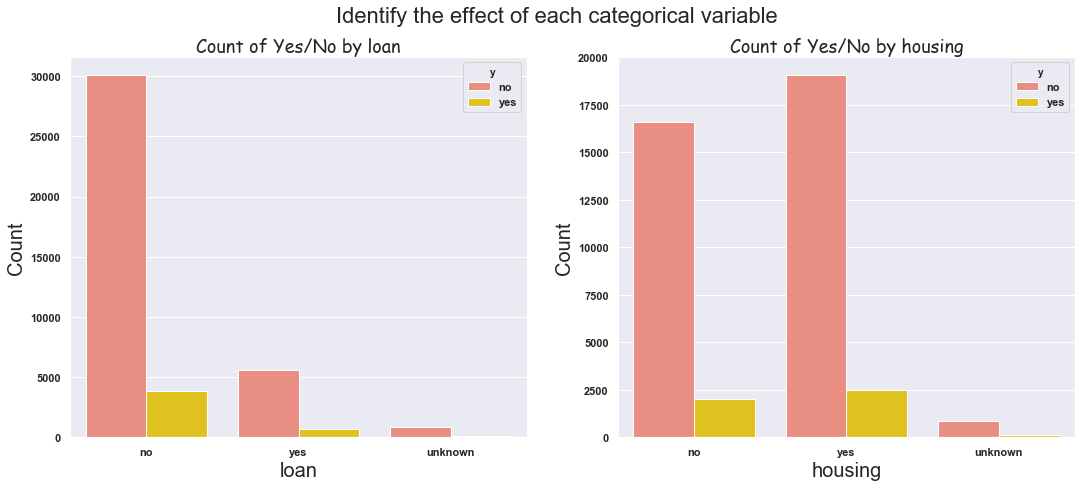

In [10]:
# use the plot_multiple_categorical_against_target method of the PreProcessing class
# to plot the count of each categorical variable with the target as a hue
processor.plot_multiple_categorical_against_target(['poutcome','marital','loan','housing'])

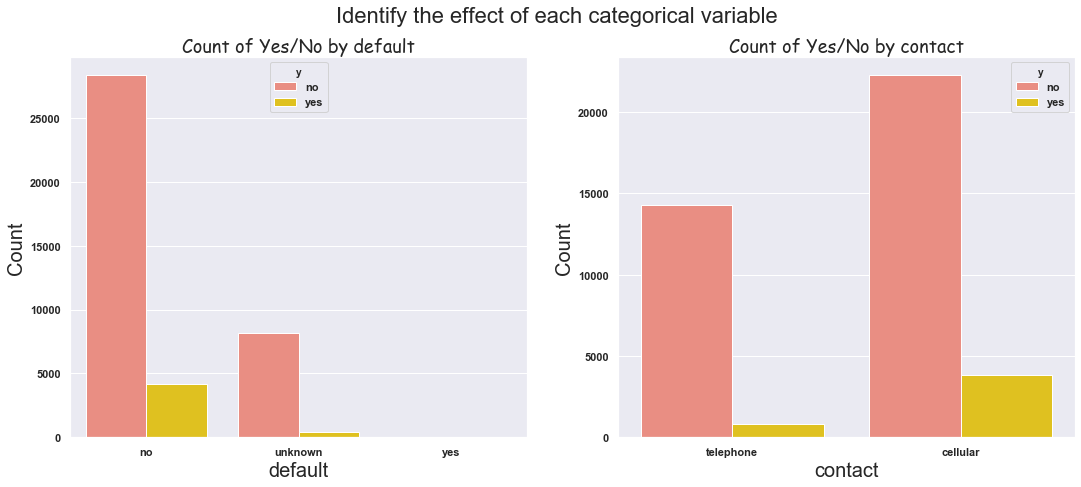

In [11]:
processor.plot_multiple_categorical_against_target(['default','contact'])

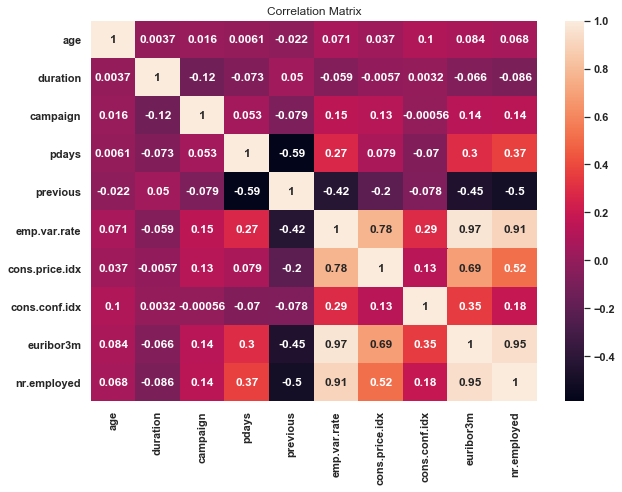

In [12]:
processor.plot_correletion_matrix()

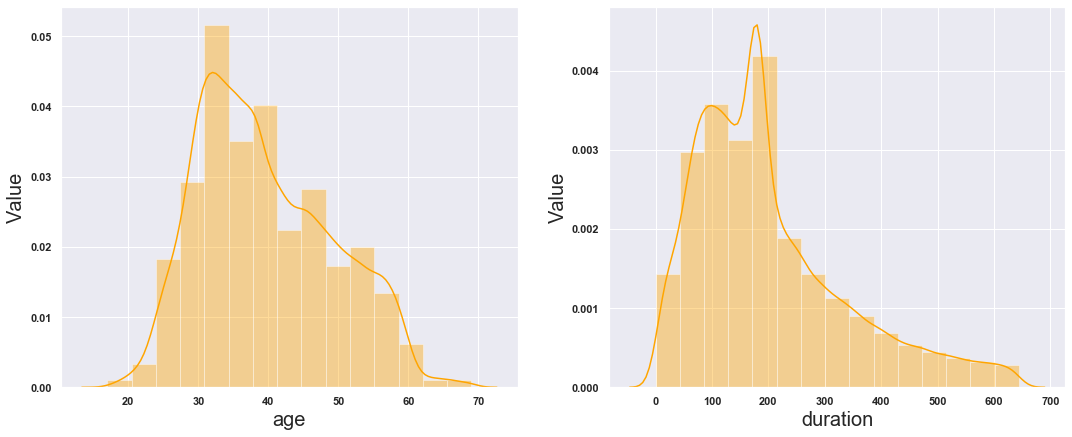

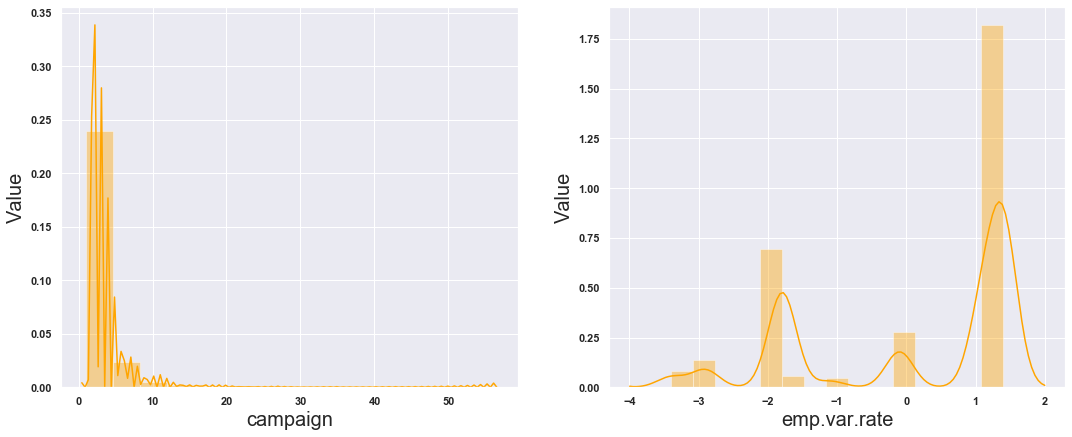

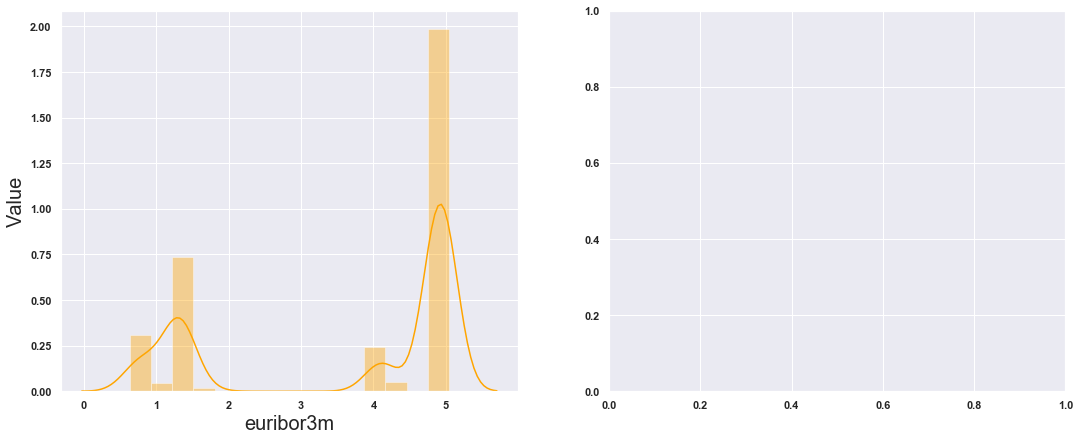

In [13]:
processor.plot_distribution(['age','duration','campaign','emp.var.rate','euribor3m'])

In [14]:
processor.assign_years()
processor.data_frame.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Year
23147,47.0,technician,married,high.school,no,no,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,2008
21838,40.0,technician,single,professional.course,no,yes,no,cellular,aug,wed,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,2008
3652,52.0,self-employed,single,basic.4y,unknown,yes,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,2008
3606,60.0,entrepreneur,married,basic.4y,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,2008
18977,30.0,admin.,single,university.degree,no,yes,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,2008
14029,30.0,admin.,married,university.degree,no,no,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,2008
34798,35.0,services,married,high.school,no,yes,no,cellular,may,thu,...,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no,2009
34371,32.0,blue-collar,married,professional.course,no,yes,no,cellular,may,thu,...,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no,2009
1308,32.0,services,married,high.school,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2008
28515,45.0,admin.,single,basic.9y,no,yes,yes,cellular,apr,tue,...,999,1,failure,-1.8,93.075,-47.1,1.423,5099.1,no,2009


In [ ]:
categorical_columns = ['job','marital','education',
                                         'default','loan','housing','contact',
                                         'month','poutcome']
numerical_columns = ['age','pdays','previous','emp.var.rate','cons.price.idx',
                                         'cons.conf.idx','euribor3m','nr.employed','Year']

In [ ]:
column_transformer = processor.get_column_transformer(categorical_columns,numerical_columns,['duration','day_of_week'])

In [ ]:
X_train,X_test,y_train,y_test=  processor.train_test_split()

In [ ]:
model.add_classifier(model.get_random_forest_classifier(),'Random Forest')
model.add_classifier(model.get_logistic_classifier(),'Logistic Regressor')
model.add_classifier(model.get_xgboost_classifier(),'XGBoost')
model.add_classifier(model.get_multi_perceptron(),'MLP')
model.create_pipes(column_transformer)

In [ ]:
kfold = model.get_cross_validation_splitter(is_strattified = False)
strattified_fold = model.get_cross_validation_splitter(is_strattified = False)

In [ ]:
models_k_fold = model.compare_models(kfold , X_train, y_train,scoring = 'roc_auc')
models_k_fold_accuracy = model.compare_models(kfold , X_train, y_train,scoring='accuracy')


In [ ]:
lb = preprocessing.LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])
models_k_fold_recall = model.compare_models(kfold , X_train, y_train,scoring='recall')
models_k_fold_precision = model.compare_models(kfold , X_train, y_train,scoring='precision')
models_k_fold_f1 = model.compare_models(kfold , X_train, y_train,scoring='f1')


In [ ]:
classifiers = models_k_fold['classifiers']
scores_auc = models_k_fold['scores']
scores_accuracy = models_k_fold_accuracy['scores']
scores_recall = models_k_fold_recall['scores']
scores_precision = models_k_fold_precision['scores']
scores_f1 = models_k_fold_f1['scores']
data = {'Classifier':classifiers , 'Auc':scores_auc, 'Accuracy': scores_accuracy,
        'Recall':scores_recall, 'Precision':scores_precision } 
performance_df = pd.DataFrame(data)
performance_df = performance_df.set_index('Classifier')
performance_df